In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
filepath = "C:\\Users\\somfl\\Documents\\Data Science Career Track\\LendingClub\\accepted_2007_to_2018Q4.csv"
df = pd.read_csv(filepath)

C:\Users\somfl\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df.columns[[0,19,49,59,118,129,130,131,134,135,136,139,145,146,147]]

Index(['id', 'desc', 'next_pymnt_d', 'verification_status_joint',
       'sec_app_earliest_cr_line', 'hardship_type', 'hardship_reason',
       'hardship_status', 'hardship_start_date', 'hardship_end_date',
       'payment_plan_start_date', 'hardship_loan_status',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date'],
      dtype='object')

In [11]:
df["id"].describe()

count      2260701
unique     2260701
top       75497472
freq             1
Name: id, dtype: int64

In [8]:
df.columns[0:40]

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv'],
      dtype='object')

In [30]:
df.columns[40:80]

Index(['total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal'],
      dtype='object')

In [31]:
df.columns[80:120]

Index(['bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit',
       'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high',
       'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths'],
      dtype='object')

In [32]:
df.columns[120:]

Index(['sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog', 'hardship_flag', 'hardship_type',
       'hardship_reason', 'hardship_status', 'deferral_term',
       'hardship_amount', 'hardship_start_date', 'hardship_end_date',
       'payment_plan_start_date', 'hardship_length', 'hardship_dpd',
       'hardship_loan_status', 'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object')

In [36]:
missing1 = df.isnull().sum()
missing2 = 100*df.isnull().mean()
missing = pd.concat([missing1, missing2], axis=1)
missing.columns = ['count', '%']

In [38]:
missing[missing["count"]==33]

,count,%
loan_amnt,33,0.00146
funded_amnt,33,0.00146
funded_amnt_inv,33,0.00146
term,33,0.00146
int_rate,33,0.00146
installment,33,0.00146
grade,33,0.00146
sub_grade,33,0.00146
home_ownership,33,0.00146
verification_status,33,0.00146


In [49]:
missing.sort_values("count", ascending=False)[0:50]

,count,%
member_id,2260701,100.000000
orig_projected_additional_accrued_interest,2252050,99.617331
hardship_end_date,2249784,99.517097
hardship_start_date,2249784,99.517097
hardship_type,2249784,99.517097
hardship_reason,2249784,99.517097
hardship_status,2249784,99.517097
deferral_term,2249784,99.517097
hardship_last_payment_amount,2249784,99.517097
hardship_payoff_balance_amount,2249784,99.517097


In [50]:
missing.sort_values("count", ascending=False)[50:100]

,count,%
open_rv_24m,866162,38.313868
open_rv_12m,866162,38.313868
total_bal_il,866162,38.313868
open_il_24m,866162,38.313868
open_il_12m,866162,38.313868
open_act_il,866162,38.313868
max_bal_bc,866162,38.313868
inq_fi,866162,38.313868
mths_since_recent_inq,295468,13.069751
emp_title,167002,7.387178


In [51]:
missing.sort_values("count", ascending=False)[100:]

,count,%
collections_12_mths_ex_med,178,0.007874
tax_liens,138,0.006104
last_credit_pull_d,105,0.004645
inq_last_6mths,63,0.002787
total_acc,62,0.002743
delinq_2yrs,62,0.002743
earliest_cr_line,62,0.002743
open_acc,62,0.002743
pub_rec,62,0.002743
acc_now_delinq,62,0.002743


In [4]:
df["loan_status"].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [9]:
df["collection_recovery_fee"].unique()

array([   0.        ,  291.402     ,   66.3066    , ...,  186.9156    ,
        325.4112    , 1255.80419997])

In [10]:
df["earliest_cr_line"].unique()

array(['Aug-2003', 'Dec-1999', 'Aug-2000', 'Sep-2008', 'Jun-1998',
       'Oct-1987', 'Jun-1990', 'Feb-1999', 'Apr-2002', 'Nov-1994',
       'Apr-1995', 'Feb-1988', 'Jun-1996', 'Jun-2005', 'May-1984',
       'Dec-2001', 'Nov-1993', 'Sep-2001', 'Mar-2005', 'May-2004',
       'Jun-1991', 'May-2000', 'Oct-2011', 'May-1994', 'Jul-2011',
       'May-1991', 'May-2001', 'Jun-2002', 'Dec-1985', 'Apr-2007',
       'Feb-2002', 'Jun-2001', 'Jun-1997', 'Oct-1996', 'Jan-2005',
       'Jul-2001', 'Aug-2004', 'Jun-2007', 'Jul-2004', 'Apr-2001',
       'Oct-2004', 'May-1992', 'Oct-1999', 'Nov-2001', 'Oct-2005',
       'Jan-2001', 'Sep-2004', 'Sep-1993', 'Nov-2005', 'Feb-1989',
       'Sep-2006', 'Oct-1982', 'Oct-2002', 'Feb-1990', 'Aug-1987',
       'Oct-1998', 'Aug-2001', 'Feb-2004', 'Aug-2009', 'Mar-2002',
       'Nov-1999', 'Jun-2006', 'Jan-1999', 'Jun-2000', 'Jan-2007',
       'Dec-1998', 'Aug-1997', 'Dec-1987', 'Feb-1996', 'Apr-1990',
       'Jun-2004', 'Jun-1995', 'Dec-2002', 'Aug-1986', 'Nov-20

In [11]:
df["emp_title"].unique()

array(['leadman', 'Engineer', 'truck driver', ..., 'Sr. Photo Producer',
       'Exec Dir Internal Audit', 'Current Operations Officer'],
      dtype=object)

In [12]:
df["hardship_flag"].unique()

array(['N', 'Y', nan], dtype=object)

In [14]:
df["initial_list_status"].unique()

array(['w', 'f', nan], dtype=object)

In [16]:
df["inq_last_12m"].unique()

array([ 4.,  6.,  1.,  0.,  3.,  2.,  5.,  9.,  7.,  8., 10., 12., 14.,
       16., 13., 20., 11., 15., 19., 18., 26., 21., 17., 30., 25., nan,
       22., 32., 24., 27., 23., 33., 31., 39., 45., 46., 29., 40., 35.,
       41., 49., 38., 36., 28., 34., 51., 67., 42., 37.])

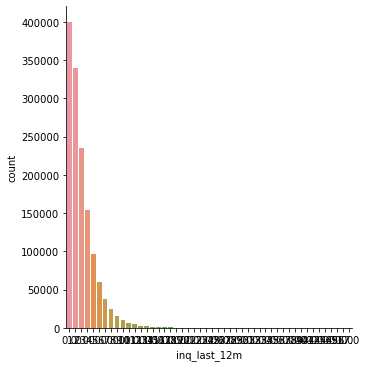

In [17]:
sns.catplot(x="inq_last_12m",data=df, kind="count")

In [18]:
df["pymnt_plan"].unique()

array(['n', 'y', nan], dtype=object)

In [19]:
df["recoveries"].unique()

array([   0.  , 1618.9 ,  368.37, ..., 1038.42, 1807.84, 6976.69])

In [20]:
df["term"].unique()

array([' 36 months', ' 60 months', nan], dtype=object)

NameError: name 'nan' is not defined

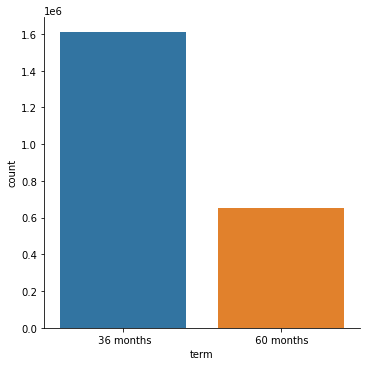

In [24]:
sns.catplot(x="term",data=df, kind="count")

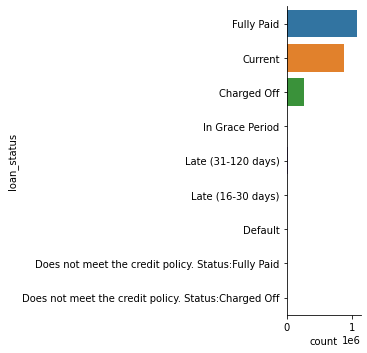

In [27]:
sns.catplot(y="loan_status",data=df, kind="count")

In [26]:
df['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [31]:
df['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [32]:
df['loan_status'].value_counts().sum()

2260668

In [33]:
df.shape

(2260701, 151)

In [34]:
2260701-2260668


33